## Задание 1.1.1

In [1]:
def qZ(x, y):
    return (x - 3*y +1) / (3*x**2 + y**2 + 1)

def qSumZ(Z):
    return sum(Z)

def sorting(Z):
    sortedId = sorted(range(len(Z)), key=lambda k: Z[k])
    return sortedId

def exchangeScheme(oldx, oldy, sortedId):
    X = list(range(4))
    Y = list(range(4))
    
    X[0] = oldx[sortedId[0]]
    X[1] = oldx[sortedId[1]]
    X[2] = oldx[sortedId[2]]
    
    Y[0] = oldy[sortedId[0]]
    Y[1] = oldy[sortedId[1]]
    Y[2] = oldy[sortedId[2]]

    
    return X, Y

def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    
    X = X[:]
    Y = Y[:]
    Z = Z[:]
    
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    
    return Z, Y, Z

def evoSteps(X, Y, stepsNum = 4):
    results = list()
    
    for i in range(stepsNum):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
        
        X, Y, Z = evoStep(X, Y, arrZ)
        
        X, Y = exchangeScheme(X, Y, sorting(Z))
        
        results.append([X, Y, qSumZ(arrZ), arrZ])
        
    return X, Y, results


X = [-2, -1, 0, 2]
Y = [-2, 0, -1, 1]

results = evoSteps(X, Y)

for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')
    
qualityArrZ = list()
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
    
print(f'max Z: {max(qualityArrZ)}')

max_1_step: 2.2941176470588234
max_2_step: 0.6802783986994514
max_3_step: 1.5705069354960215
max_4_step: 0.716002089405819
max Z: 2.0


## Задание 1.2.1

In [2]:
import networkx as nx
from math import e

distances = [(1, 2, 18),
            (1, 3, 41), 
            (1, 4, 36),
            (1, 5, 29),
            (1, 6, 19),
            (2, 3, 27),
            (2, 4, 31),
            (2, 5, 37),
            (2, 6, 15),
            (3, 4, 19),
            (3, 5, 42),
            (3, 6, 23),
            (4, 5, 24),
            (4, 6, 17),
            (5, 6, 24)]

V = [1, 3, 4, 5, 6, 2, 1]

Z = [(2, 4),
    (3, 4),
    (4, 6),
    (5, 6)]

P = [33 , 82, 51, 76]

T = 100

def probability(delta, T):
    return 100 * e ** (-delta/T)

def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT

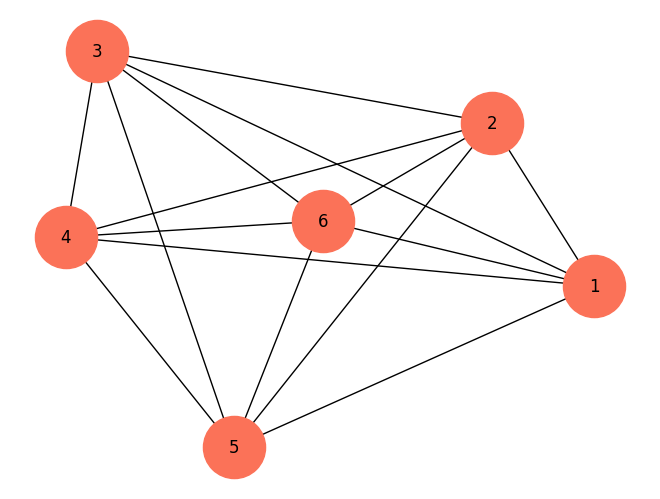

In [4]:
graph = nx.Graph()
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

In [5]:
def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if  (item[0] == i and item[1] == j) or (item[1] == i and item[0] -- j) else -1)
                   for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

In [6]:
def routeLength(V, distances):
    edges = list()
    
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
    
    return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0
    
    arrV[Z[0] - decrement], arrV[Z[-1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    
    return arrV

In [11]:
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]
    
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength
        
        if deltaS > 0:
            p = probability(deltaS, T)
            
            if p > P[i]:
                V = newV
                sumLength = newS
            
        else:
            V = newV
            sumlength = newS
            
        T = reductTemp(T)
        
    return V, arrSum

In [12]:
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] \
            or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
                
    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

Лучший выбранный маршрут: [1, 5, 3, 2, 4, 6, 1]
Длина лучшего выбранного маршрута: 203
Длины всех рассмотренных маршрутов: [202, 190, 190, 190, 203]


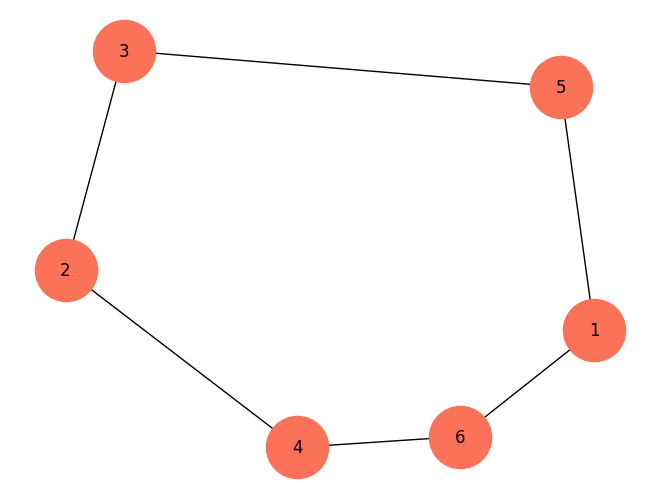

In [13]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)